In [1]:
# initial
import time
import numpy as np

z_vec = np.array([1, 2, 5])
z_num = len(z_vec)
z_pdf = np.array([[0.9, 0.05, 0.05],
                  [0.1, 0.8, 0.1],
                  [0.15, 0.15, 0.7]])

k_min, k_max, k_num = 0, 50, 250
k_vec = np.linspace(k_min, k_max, k_num)
k_mat = k_vec.reshape(k_num, 1) @ np.ones((1, k_num))

shape = (k_num, z_num)


def vfi(θ=0.6, δ=0.15, β=0.95, p=0.1):
    time_begin = time.time()

    v_old = np.ones(shape)
    v_new = np.zeros(shape)
    v_tol = 1e-5
    v_ctr = 0

    policy = np.zeros(shape, dtype="int")

    while np.max(np.abs(v_old - v_new)) > v_tol:
        v_old = np.copy(v_new)
        for z_curr in range(z_num):
            v_expected = z_pdf[z_curr, :] @ v_old.T
            π = z_vec[z_curr] * (k_mat ** θ)
            d = π + p * (1 - δ) * k_mat - p * k_mat.T
            d[d < 0] = -1e10
            v_new[:, z_curr] = np.max(d + β * v_expected, 1)
            policy[:, z_curr] = np.argmax(d + β * v_expected, 1)

        v_ctr += 1

    time_end = time.time()

    #     print("price ::", p)
    #     print("v_ctr ::", v_ctr)
    #     print("time  ::", time_end - time_begin)

    return policy, v_new


def eq(policy):
    shape = policy.shape
    μ_old = np.zeros(shape)
    μ_new = np.ones(shape) / (k_num * z_num)
    μ_tol = 1e-5
    μ_ctr = 0

    while np.max(np.abs(μ_old - μ_new)) > μ_tol:
        μ_old = np.copy(μ_new)
        μ_new = np.zeros(shape)
        for k_curr in range(k_num):
            for z_curr in range(z_num):
                k_next = policy[k_curr, z_curr]
                μ_new[k_next, :] += μ_old[k_curr, z_curr] * z_pdf[z_curr]
        μ_ctr += 1

    return μ_new


p_h = 50
p_l = 1e-3
p_tol = 1e-5
p_ctr = 0

while p_h - p_l > p_tol:
    p_guess = (p_h + p_l) / 2
    policy, v_new = vfi(p=p_guess)
    μ_invar = eq(policy)
    k_demand = np.sum(np.sum(μ_invar, 1) * k_vec)
    #     print(policy)
    #     print(μ_invar)
    if k_demand > 10:
        p_l = p_guess
    else:
        p_h = p_guess
    p_ctr += 1
    print("=" * 20)
    print("p_guess  ::", p_guess)
    print("k_demand ::", k_demand)
    print("p_ctr    ::", p_ctr)

# price = 2.567995539784431


p_guess  :: 25.0005
k_demand :: 2.525457948437766e-07
p_ctr    :: 1
p_guess  :: 12.50075
k_demand :: 0.20002585542591692
p_ctr    :: 2
p_guess  :: 6.250875
k_demand :: 1.0692354517770246
p_ctr    :: 3
p_guess  :: 3.1259375
k_demand :: 6.071198931269351
p_ctr    :: 4
p_guess  :: 1.56346875
k_demand :: 24.024549930878464
p_ctr    :: 5
p_guess  :: 2.344703125
k_demand :: 12.2350730765916
p_ctr    :: 6
p_guess  :: 2.7353203125
k_demand :: 8.197376984241492
p_ctr    :: 7
p_guess  :: 2.5400117187499998
k_demand :: 10.153029292638367
p_ctr    :: 8
p_guess  :: 2.637666015625
k_demand :: 9.098846905458759
p_ctr    :: 9
p_guess  :: 2.5888388671874996
k_demand :: 9.996522246536891
p_ctr    :: 10
p_guess  :: 2.5644252929687497
k_demand :: 10.146847516931674
p_ctr    :: 11
p_guess  :: 2.5766320800781246
k_demand :: 9.986426226817837
p_ctr    :: 12
p_guess  :: 2.570528686523437
k_demand :: 9.997255658902171
p_ctr    :: 13
p_guess  :: 2.567476989746093
k_demand :: 10.144776107932634
p_ctr    :: 14
p_

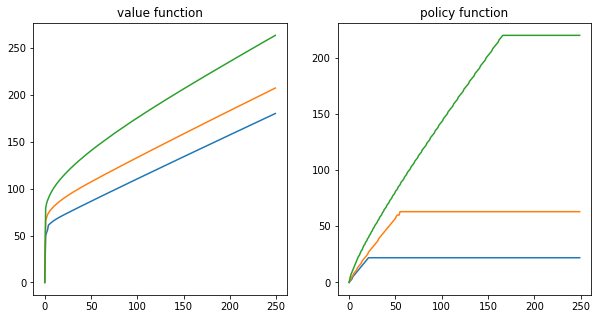

In [4]:
import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=[10, 5], sharex=True)
ax1.plot(v_new)
ax1.set_title("value function")
ax2.plot(policy)
ax2.set_title("policy function")
plt.show()


In [5]:
z_vec = np.array([1, 2, 4])

p_h = 50
p_l = 1e-3
p_tol = 1e-5
p_ctr = 0

while p_h - p_l > p_tol:
    p_guess = (p_h + p_l) / 2
    policy, v_new = vfi(p=p_guess)
    μ_invar = eq(policy)
    k_demand = np.sum(np.sum(μ_invar, 1) * k_vec)
    #     print(policy)
    #     print(μ_invar)
    if k_demand > 10:
        p_l = p_guess
    else:
        p_h = p_guess
    p_ctr += 1
    print("=" * 20)
    print("p_guess  ::", p_guess)
    print("k_demand ::", k_demand)
    print("p_ctr    ::", p_ctr)

# price = 2.2654960967302324


p_guess  :: 25.0005
k_demand :: 2.525457948437766e-07
p_ctr    :: 1
p_guess  :: 12.50075
k_demand :: 0.200000502048869
p_ctr    :: 2
p_guess  :: 6.250875
k_demand :: 0.6895003175874059
p_ctr    :: 3
p_guess  :: 3.1259375
k_demand :: 4.460002121558613
p_ctr    :: 4
p_guess  :: 1.56346875
k_demand :: 22.35770820567938
p_ctr    :: 5
p_guess  :: 2.344703125
k_demand :: 9.433574066534936
p_ctr    :: 6
p_guess  :: 1.9540859375
k_demand :: 14.693486225974882
p_ctr    :: 7
p_guess  :: 2.14939453125
k_demand :: 11.571012896242687
p_ctr    :: 8
p_guess  :: 2.247048828125
k_demand :: 10.444155807322002
p_ctr    :: 9
p_guess  :: 2.2958759765625
k_demand :: 9.931805918312985
p_ctr    :: 10
p_guess  :: 2.27146240234375
k_demand :: 9.9403413684023
p_ctr    :: 11
p_guess  :: 2.259255615234375
k_demand :: 10.268734916457301
p_ctr    :: 12
p_guess  :: 2.2653590087890625
k_demand :: 10.079765894578852
p_ctr    :: 13
p_guess  :: 2.2684107055664064
k_demand :: 9.955592503648628
p_ctr    :: 14
p_guess  :: 2